In [5]:
import geoplot
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


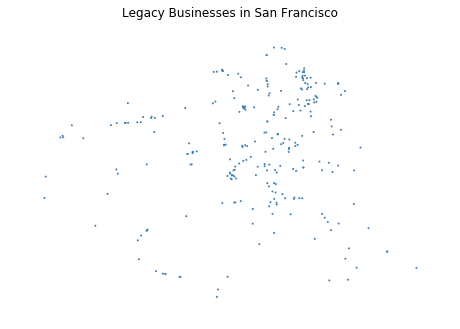

In [125]:
# Create GeoDataFrame of legacy businesses and plotting
legacybusiness = gpd.read_file('LegacyBiz1.csv')

legacybusiness.Longitude = legacybusiness.Longitude.astype('float64')
legacybusiness.Latitude = legacybusiness.Latitude.astype('float64')

legacybusiness_geometry = [Point(xy) for xy in zip(legacybusiness.Longitude, legacybusiness.Latitude)]
gdf = gpd.GeoDataFrame(legacybusiness, geometry=legacybusiness_geometry)

# Plotting a map of where the businesses are located

ax = geoplot.pointplot(legacybusiness, s = 1)  # size of each point

ax.set_title("Legacy Businesses in San Francisco")

plt.show()

In [77]:
# Convert LegacyBusinesses to a GeoDataFrame
nhood_map = gpd.read_file('geo_export_c72d5138-0ae8-43d9-ab2a-fced89798b3e.shp')

# Map Projections
legacybusiness.crs = nhood_map.crs 

# Merge the two dataframes, how=left to ensure that neighborhoods with no legacy businesses
#still show up
legacybusiness = gpd.sjoin(legacybusiness,nhood_map,how='left')

In [78]:
legacybusiness

,Name,Address,City,State,Phone,Website,Date_OnRegistry,Type,Latitude,Longitude,geometry,index_right,nhood
0,Academy of Ballet,2121 Market Street,San Francisco,California,415-552-1166,https://sfacademyofballet.com/,11/12/19,School,37.766983,-122.429272,POINT (-122.42927 37.76698),2,Castro/Upper Market
1,Acción Latina,2958 24th Street,San Francisco,California,415-648-1045,http://accionlatina.org/en/,3/17/17,Community / Non-profit,37.752898,-122.411270,POINT (-122.41127 37.75290),20,Mission
2,"Adobe Books and Arts Cooperative, Inc.",3130 24th Street,San Francisco,California,(415) 864-3936,https://www.adobebooks.com/,1/13/20,Bookstore,37.752666,-122.414778,POINT (-122.41478 37.75267),20,Mission
3,AIDS Legal Referral Panel,"1663 Mission Street, Suite 500",San Francisco,California,415-701-1100,http://www.alrp.org/,1/22/18,Community / Non-profit,37.771147,-122.419191,POINT (-122.41919 37.77115),20,Mission
4,Alioto’s Restaurant,#8 Fisherman’s Wharf,San Francisco,California,415-673-0183,https://aliotos.com/,1/14/19,Restaurant / Food Business,37.808948,-122.416046,POINT (-122.41605 37.80895),25,North Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Yasukochi's Sweet Shop,1790 Sutter Street,San Francisco,California,415-931-8165,https://www.yelp.com/biz/yasukochis-sweet-stop...,8/12/19,Restaurant / Food Business,37.786736,-122.429783,POINT (-122.42978 37.78674),31,Pacific Heights
263,Yuet Lee Restaurant,1300 Stockton Street,San Francisco,California,415-982-6020,https://www.sanfranciscoyuetlee.com/,2/25/19,Restaurant / Food Business,37.797860,-122.408426,POINT (-122.40843 37.79786),3,Chinatown
264,Zam Zam,1633 Haight Street,San Francisco,California,415-861-2545,http://zamzambar.com/,12/12/16,Bar / Brewery,37.769531,-122.449375,POINT (-122.44938 37.76953),9,Haight Ashbury
265,Zazie,941 Cole Street,San Francisco,California,415-564-5332,https://www.zaziesf.com/,11/12/19,Restaurant / Food Business,37.765296,-122.450152,POINT (-122.45015 37.76530),9,Haight Ashbury


In [80]:
#Creating a dataframe mapping neighborhoods to legacy business counts
legacybusiness_count = legacybusiness.nhood.value_counts(dropna=True)

nhood_counts = pd.DataFrame({'nhood':legacybusiness_count.index, 'legacybusiness_count':legacybusiness_count.values})
nhood_counts


,nhood,legacybusiness_count
0,Mission,36
1,Financial District/South Beach,19
2,Castro/Upper Market,18
3,Bayview Hunters Point,16
4,Tenderloin,16
5,South of Market,15
6,Chinatown,15
7,Haight Ashbury,11
8,North Beach,10
9,Outer Richmond,10


In [81]:
#Create a new column to include counts in our original neighborhood map
#Replacing null counts with 0

nhood_map = nhood_map.merge(nhood_counts
, how='left', on = 'nhood')

nhood_map = nhood_map.fillna(0)

<function matplotlib.pyplot.show(*args, **kw)>

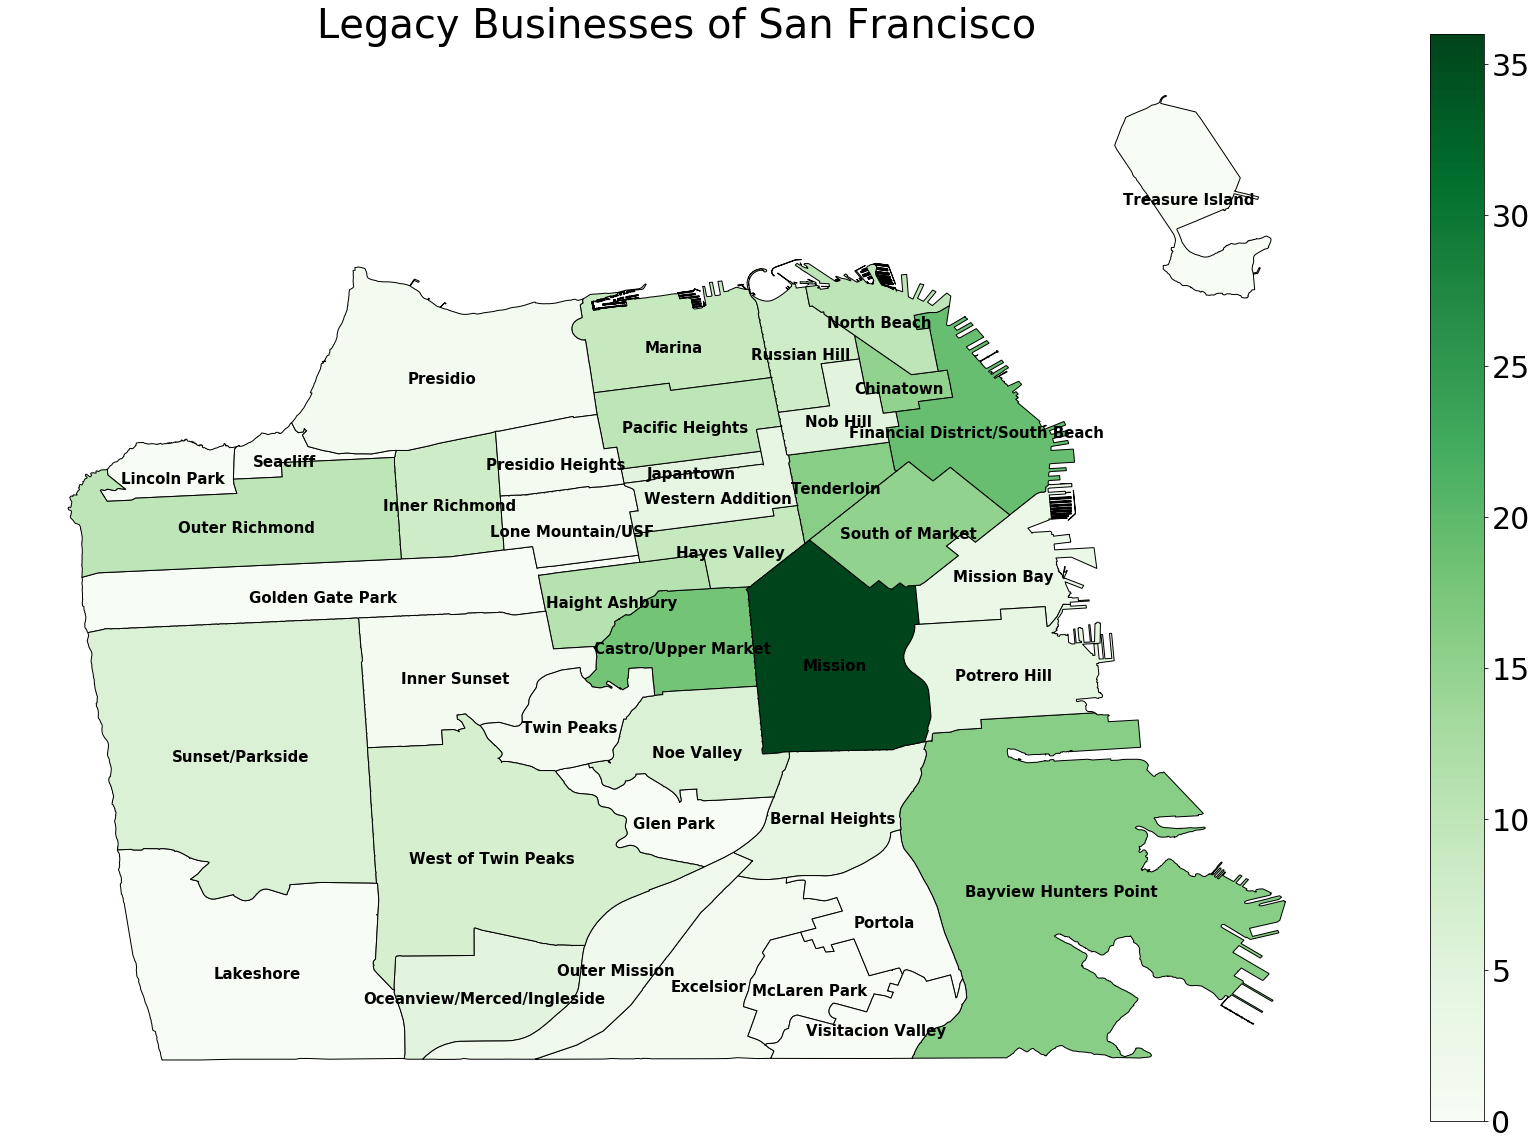

In [129]:
#Color the map according to the total number of businesses
plt.rcParams['legend.fontsize'] = 'large'
ax = nhood_map.plot(column = 'legacybusiness_count', cmap='Greens',figsize=(30,20),
                    legend =True, linewidth=1,edgecolor='black')
#Formatting
ax.axis('off')
ax.set_title('Legacy Businesses of San Francisco',fontsize=40,color='black')
fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=30)
#Label the neighborhoods
for i in nhood_map.index:
 coords = nhood_map.geometry[i].centroid.coords[0]
 ax.annotate(s = nhood_map['nhood'][i], xy = coords,horizontalalignment='center',verticalalignment='top' ,color='black',fontweight='heavy',fontsize=15)
plt.show